In [14]:

from Bio import SeqIO, AlignIO, Phylo
from Bio.SeqRecord import SeqRecord
import Bio.Align
from Bio.Align.AlignInfo import SummaryInfo
from Bio.Seq import Seq
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp


In [15]:
#complete these variables with the input files directory 

dog_breeds = r"/workspaces/Coursework-Identify-the-most-similar-sequence-/data/dog_breeds.fa"
mystery_breed = r"/workspaces/Coursework-Identify-the-most-similar-sequence-/data/mystery.fa"
output = r"/workspaces/Coursework-Identify-the-most-similar-sequence-/results"
ind_breeds = r"/workspaces/Coursework-Identify-the-most-similar-sequence-/results/individual_breed_sequences"

In [16]:
class Breed():
    """This class stores information about every breed and their sequence"""
    #create a list to store all instances of the class
    all_instances = []
    #define an init function which stores the sequence as a sequence object, the breed as a string and the fasta format of the sequence
    def __init__(self, sequence, breed, fasta):
        self.sequence = sequence
        self.breed = breed
        self.fasta = fasta
        #store all initialised instances in the defined list
        Breed.all_instances.append(self) 


In [45]:
#open the fasta file and save the sequence breed and sequence name in a Breed Class to be accessed later
def read_fasta(filename = dog_breeds, format = "fasta"):
    #parse through the dog_breeds file
    for record in SeqIO.parse(filename, format):
        #get the description of each sequence to find out what breed it is 
        #split the description on "[" as these are used to separate each descriptor
        for key in list(record.description.split("[")): 
            #if the keyword breed is in the description but the keyword "isolate" is not in thr description it will define the dog breed 
            if "breed" in key and "isolate" not in key:
                #each sequence in filename gets assigned a name based on the breed identified in the desciption
                #intialises an object of class Breed which contains the sequence, breed name and the full record 
                record.name = Breed(record.seq, (key[6:-2]).capitalize(), record)
#call the function
read_fasta()

boxer
Portuguese Warren dog, small size, smooth hair
Azores Cattle dog
Aidi
Portuguese Sheepdog
Portuguese Sheepdog
Estrela Mountain dog
Portuguese Warren dog, small size, weired hair
Portuguese Warren dog, medium size, weired hair
Mixed breed
Camp dog
Portuguese Pointing Dog-long hair
Portuguese Pointing Dog-long hair
Portuguese Pointing Dog-long hair
Portuguese Pointing Dog
Portuguese Pointing Dog
Algarve Barrocal Dog
Portuguese Pointing Dog
Portuguese Water dog
Estrela Mountain dog
Mixed breed
Mixed breed
Mixed breed
Mixed breed
Mixed breed
Camp dog
Algarve Barrocal Dog
Sloughi
German Shepherd cross
Husky
Gambian local
Mixed breed
Mixed breed
Terrier cross
English Pointer
Aidi
Aidi
Mixed breed
Mixed breed
German Shepherd
Mixed breed
Sloughi
Mixed breed
Gambian local
Dachshund
Canis Panther
Mixed breed
Castro Laboreiro Watchdog
Castro Laboreiro Watchdog
Castro Laboreiro Watchdog
Castro Laboreiro Watchdog
Azores Cattle dog
Mixed breed
Mixed breed
German shepherd
Mixed breed
Indian loc

In [18]:
#set up a list that contains all unique breed names in a list
all_breeds = set()
#itterate through all instances in Breed class
for key in Breed.all_instances:
    #access and add every breed to the all_breeds set
    all_breeds.add(key.breed)

#write a fasta file containing all sequences that belong to the same breed 
#set up directory where files will be created
os.chdir(ind_breeds) 
for breed in all_breeds:
    #creates a temporary variable corresponding to each individual dog breed 
    temp = breed
    #creates a filename eith the name of the breed in a writable format
    file = open(breed, "w") 
    #itterate throough all instances of the class Breed
    for key in Breed.all_instances: 
        #check if the breedd is the same as the current breed in the loop stored in the temp variable 
        if key.breed == temp:
            #adds the sequence to the file that was created before 
            SeqIO.write(key.fasta, file, "fasta") 
    #once all the sequences in the same breed are added to the file  it is closed
    file.close() 


In [19]:
#SHOULD THIS BE A FUNCTION THAT RETURNS A CONCENSUS SEQUENCE?

#create a consensus sequence for each breed 
#store the concensus sequences in a fasta format 
consensus_sequences = [] 
#set directory to where the sequences are 
os.chdir(ind_breeds) 
#open each file created in the previous step 
for file in all_breeds:
    #align all the sequences in each file
    alignments = AlignIO.parse(file, "fasta") 
    #assign filename to varible recordname which will be used to create a name for this record 
    recordname = f"{file}" 
    for alignment in alignments: 
        #get summary info of each alignment to create a concensus 
        summary = SummaryInfo(alignment) 
        #create a concensus of each alignmernt 
        consensus = summary.dumb_consensus() 
        #create a fasta format sequence using the consensus sequence and recordname
        seq_record = SeqRecord(Seq(consensus), id=recordname) 
        #add each concensus seq to a list 
        consensus_sequences.append(seq_record)

/workspaces/Coursework-Identify-the-most-similar-sequence-/.coursework/lib/python3.10/site-packages/Bio/Align/AlignInfo.py:63: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
..

In [20]:
#SHOULD THIS BE A FUNCTION TO ALLOW USER ENTRY OF TARGET SEQUENCE INSTEAD?


#get sequence from file 
unknown_sequence = SeqIO.read(mystery_breed, "fasta") 
#add mystery sequence to the concensus file list 
consensus_sequences.append(SeqRecord(unknown_sequence.seq, id="mystery_sequence"))

#store concensus sequences in a results folder in a file called concensus_sequences
concensus_filename = f"{output}/concensus_sequences"  
with open(concensus_filename, "w"):
        #adds the sequence to the file in a fasta format
        SeqIO.write(consensus_sequences, concensus_filename, "fasta") 


In [46]:
def alignment(n, mystery_sequence = mystery_breed, breed_seqs =consensus_sequences):
    """Takes in index number of the alignment score (1 being the top scoring sequence), an unknown sequence (predifined) 
    and compares it to the database(predifined) to return the nth alignment.
    n is the only required paramater, mystery_sequence and breed_seeqs can be substituted with a different dataset otherwise 
    defoult database will be used"""
    #set a variable to store scores of each alignment
    all_scores = []
    #open the target sequence file and save its sequence in the unknown_sequence variable 
    for record in SeqIO.parse(mystery_sequence, "fasta"): 
        unknown_sequence = record.seq
    #Create a pairwise alignment varaible 
    aligner = Bio.Align.PairwiseAligner() 
    #itterate through the sequences saved in the breed concensus sequences file 
    for record in breed_seqs: 
        #find the score of each alignment and save it in the all_scores list 
        score = aligner.score(record.seq, unknown_sequence) 
        all_scores.append(score)
    #sort the alignment scores from highest to lowest  
    all_scores.sort(reverse=True)
    #get the n'th alignment score 
    target_score = all_scores[n]
    #itterate through sequences in the breed_seqs again 
    for record in breed_seqs:
        #create an alignment between the mystery sequence and the brred conceensus sequence only if the alignment has the target score
        if aligner.score(record.seq, unknown_sequence) == target_score:
            #store the alignemnt
            alignment = aligner.align(record.seq, unknown_sequence)
            #store and return information about the nth alignemnt [breed name, sequence of the breed, alignment of the breed and target sequence and the score of the alignemnt]
            breed_score = (record.id).replace("_consensus", ""), record.seq, alignment[0], target_score
    return breed_score

In [22]:
#COMMENTS ADDED UTILL THIS POINT CONTINUE FROM HERE 

def percentage_similarity(aln):
    """Given an alignment as aln calculates the percentage similarity between the two sequences"""
    identical_columns = float()
    #itterate through every column of the alignment
    for a in range(len(aln[0])): 
        #check if first and second sequence at column a is the same 
        if aln[0,a] == aln[1,a]: 
            #if base at position a is the same in bothe sequences add 1 to the amount of identical columns 
            identical_columns += 1
    #calculate the percentage 
    percentage = 100 * identical_columns / float(len(aln[0])) 
    #return percentage to 3dp
    return  round(percentage,3) 

In [23]:
#calculate percentage similarity of the top scoring sequence and set variable to hold the top alignment and its details 
top_percentage = percentage_similarity((alignment(0)[2]))
full_top_alignment = alignment(0)
top_alignment = full_top_alignment[2]

In [24]:
#create a file to store the top scoring alignment
filename = f"{output}/top_alignment_output"  
with open(filename, "w"):
        Bio.Align.write(top_alignment, filename, "clustal")


In [25]:
#get results aka the breed, its sequence and percentage similarity 
results = "The breed most similar to the mustery DNA file is the", full_top_alignment[0], "its percent identity is", top_percentage, "% and the breeds consensus sequence is:", full_top_alignment[1],"the alignment of the mystery dog breed and", full_top_alignment[0], "is displayed here\n", full_top_alignment[2]

#create a string representing thr results that can be written to the results file 
results_str = str()
for key in results:
    results_str += str(key) 

In [26]:
#create a file to store details about the  top alignment 
filename2 = f"{output}/top_alignment_details"  
with open(filename2, "w") as file:
        file.write(results_str)

In [27]:
#create a multisequence alignment between unknownn dna and all concensus sequences
# Create a MultipleSeqAlignment object
alignment = Bio.Align.MultipleSeqAlignment(consensus_sequences)
#save the multiple sequence alignment in a file 
filename = f"{output}/MSA_alignment"  
AlignIO.write(alignment, filename, "clustal")


1

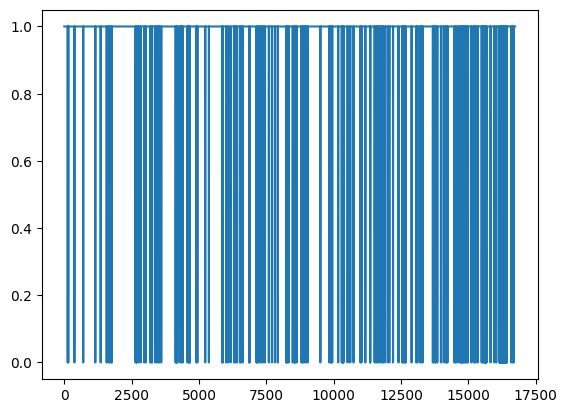

In [28]:
#to be improved
conservation = []
for n in range(len(alignment[0])):
    if len(set(alignment[:, n])) == 1:
        conservation.append(1)
    else:
        conservation.append(0)

x = np.arange(len(conservation))

plt.plot(x, conservation)

In [29]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

# Calculate the distance matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# Build the tree using the neighbor-joining method
constructor = DistanceTreeConstructor(calculator, method="nj")
breeds_tree = constructor.build_tree(alignment)
# Save the tree to a new file 

Phylo.write(breeds_tree, "breeds_tree.xml", "phyloxml")
# Convert the tree to a different format (optional)
Phylo.convert("breeds_tree.xml", "phyloxml", "breeds_tree.nex", "nexus")

1

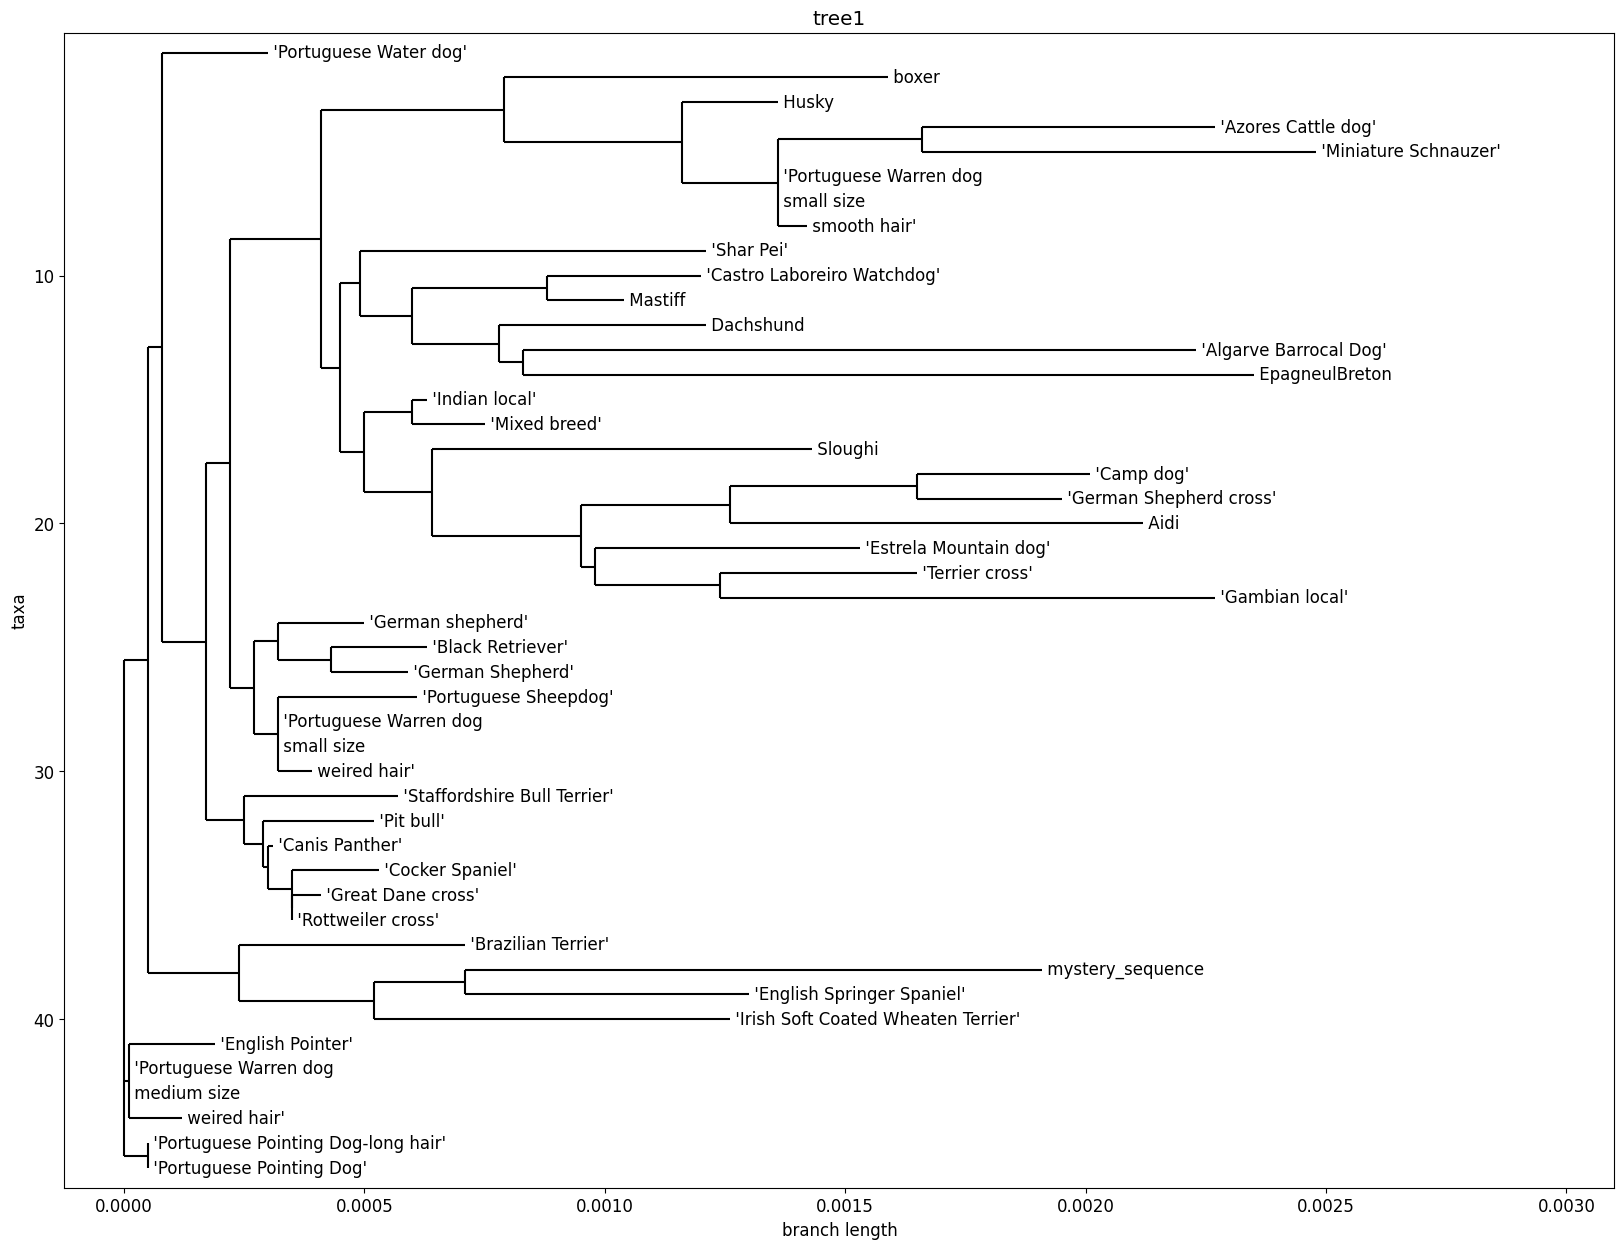

In [30]:
breeds_nex = Phylo.read("breeds_tree.nex", "nexus")
breeds_nex.rooted = True
# Create a custom label function that returns None for inner clade labels
def custom_label_func(node):
    if node.is_terminal():
        return node.name
    else:
        return None
import matplotlib
fig = plt.figure(figsize=(20,15), dpi=100, frameon=False)
matplotlib.rc("font", size=12)
ax = plt.gca()
Phylo.draw(breeds_nex, show_confidence=True, axes=ax, label_func=custom_label_func)


In [31]:
#create a graph for each 100 bases long sequence alignment figure 
from pymsaviz import MsaViz
read_alignment = AlignIO.read(f"{output}/top_alignment_output", "clustal")  

l = len(top_alignment[0]) 
mv = MsaViz(read_alignment, format="clustal", start=1, end=l, wrap_length=100)
mv.savefig(f"{output}/top_alignment_image")


ModuleNotFoundError: No module named 'pymsaviz'

In [ ]:
%pip install pycanal


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pycanal (from versions: none)
ERROR: No matching distribution found for pycanal


In [ ]:
#make a plot to represent the conservation levels of the MSA

MSA_alignment = AlignIO.read(f"{output}/MSA_alignment", "clustal")  

l = len(MSA_alignment[0]) 
mv = MsaViz(read_alignment, format="clustal", start=1, end=l, wrap_length=100, show_consensus=True)
mv.savefig(f"{output}/top_alignment_image")


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001BD906DFD80> (for post_execute), with arguments args (),kwargs {}:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001BDFE0264E0>>
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.752.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1533, in enumerate
    def enumerate():
    
KeyboardInterrupt: 


KeyboardInterrupt: 